## 1. Importing the libraries

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Reading and Understanding

In [348]:
# importing the dataset
telecom_df=pd.read_csv(r'telecom_churn_data.csv')

In [349]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [350]:
# checking the numer of rows and columns in the dataset
telecom_df.shape

(99999, 226)

In [351]:
# info of columns in the dataset
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [352]:
telecom_df.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## 3. Filtering out High value customers

Filtering high value customers from the dataset : High value customers can be filtered out based on total recharge amount (data+ normal recharge) for a month. They are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [353]:
# Total Data recharge can be calculated using total_rech_data and av_rech_amt_data fields in the data
# total_rech_amt_data = av_rech_amt_data * total_rech_data

telecom_df['total_rech_amt_data_6']=telecom_df['av_rech_amt_data_6']*telecom_df['total_rech_data_6']
telecom_df['total_rech_amt_data_7']=telecom_df['av_rech_amt_data_7']*telecom_df['total_rech_data_7']

# We can now sum up data and non data recharge to get total recharge amount by customer

# total recharge = total_rech_amt_data + total_rech_amt

telecom_df['total_recharge_amt_6'] = telecom_df['total_rech_amt_data_6'].fillna(0) +telecom_df['total_rech_amt_6'].fillna(0) 
telecom_df['total_recharge_amt_7'] = telecom_df['total_rech_amt_data_7'].fillna(0) +telecom_df['total_rech_amt_7'].fillna(0) 

#Average recharge in June and July

# avg total rech = (total rech in june + total rech in July)/2
telecom_df['avg_total_rech_6_7'] = (telecom_df.total_recharge_amt_6 + telecom_df.total_recharge_amt_7)/2

# Calculating 70th percentile of the Total average recharge amount
print("70th percentile : ", telecom_df.avg_total_rech_6_7.quantile(0.7))

# fitlering the data based on 70th percentile of total Average recharge value
telecom_df_high_value = telecom_df.loc[telecom_df.avg_total_rech_6_7 >= telecom_df.avg_total_rech_6_7.quantile(0.7), :]
telecom_df_high_value = telecom_df_high_value.reset_index(drop=True)

print(" dataset retained:",telecom_df_high_value.shape)


70th percentile :  478.0
 dataset retained: (30001, 231)


Around 30000 customers are high value customers among the 99999 customers.

In [354]:
telecom_df_high_value.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_recharge_amt_6,total_recharge_amt_7,avg_total_rech_6_7
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.0,29464.0,28827.0,28100.0,29456.000000,29464.000000,2882

## 4. Data Cleaning 

P.S. The filtering out of high value customers is done before data preparation as opposed to the instructions mentioned in Live session. We have tried both the methods and both yield the same results. 

In [355]:
## Checking the recharge related columns

rech = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_df_high_value[rech].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,16756.000000,17057.000000,15953.000000,15220.000000,16756.000000,17057.000000,15953.000000,15220.000000,16756.000000,17057.000000,15953.000000,15220.000000,16756.000000,17057.000000,15953.000000,15220.000000,16756.000000,17057.000000,15953.000000,15220.000000
mean,2.985975,3.260597,3.050147,2.688305,2.221175,2.457642,2.272676,1.872930,0.764801,0.802955,0.777471,0.815375,139.798580,140.431143,136.329217,140.813403,233.931758,245.857602,229.680303,227.723582
std,3.227379,3.496721,3.538953,2.850426,3.005300,3.235315,3.112685,2.462682,1.477739,1.617808,1.667737,1.637518,118.851784,120.247247,119.531924,119.665087,218.390120,221.691977,217.346118,214.946709
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.000000,123.000000,138.000000,100.000000,98.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,152.000000,152.000000,152.000000,184.000000,198.000000,179.000000,179.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,198.000000,198.000000,198.000000,198.000000,296.000000,304.000000,274.000000,273.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4061.000000,4061.000000


if the minimum value for maximum recharge, average recharge and total recharge is 1, it can be concluded that the null values are 0.

In [356]:
zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [357]:
# impute missing values with 0
telecom_df_high_value[zero] = telecom_df_high_value[zero].apply(lambda x: x.fillna(0))

In [358]:
# checking the null values
round(100*(telecom_df_high_value.isnull().sum()/len(telecom_df_high_value.index)), 2).sort_values(ascending=False)

arpu_2g_9                   49.27
night_pck_user_9            49.27
count_rech_2g_9             49.27
count_rech_3g_9             49.27
arpu_3g_9                   49.27
date_of_last_rech_data_9    49.27
fb_user_9                   49.27
count_rech_2g_8             46.83
count_rech_3g_8             46.83
arpu_3g_8                   46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
date_of_last_rech_data_8    46.83
fb_user_8                   46.83
fb_user_6                   44.15
date_of_last_rech_data_6    44.15
count_rech_2g_6             44.15
count_rech_3g_6             44.15
total_rech_amt_data_6       44.15
arpu_2g_6                   44.15
night_pck_user_6            44.15
arpu_3g_6                   44.15
date_of_last_rech_data_7    43.15
arpu_3g_7                   43.15
fb_user_7                   43.15
count_rech_2g_7             43.15
night_pck_user_7            43.15
total_rech_amt_data_7       43.15
count_rech_3g_7             43.15
arpu_2g_7     

In [359]:
## Checking the categorical Variables 

cat = ['night_pck_user_9','night_pck_user_8','fb_user_8','fb_user_6','fb_user_7','fb_user_9','night_pck_user_6',
      'night_pck_user_7']

## The null values can be considered as those who donot use such services. Hence they can be given a value of 99 or -1. 

telecom_df_high_value[cat] = telecom_df_high_value[cat].fillna(99)
telecom_df_high_value[cat] = telecom_df_high_value[cat].astype(str)
telecom_df_high_value[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   night_pck_user_9  30001 non-null  object
 1   night_pck_user_8  30001 non-null  object
 2   fb_user_8         30001 non-null  object
 3   fb_user_6         30001 non-null  object
 4   fb_user_7         30001 non-null  object
 5   fb_user_9         30001 non-null  object
 6   night_pck_user_6  30001 non-null  object
 7   night_pck_user_7  30001 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [360]:
# checking the null values
round(100*(telecom_df_high_value.isnull().sum()/len(telecom_df_high_value.index)), 2).sort_values(ascending=False)

date_of_last_rech_data_9    49.27
arpu_2g_9                   49.27
count_rech_2g_9             49.27
arpu_3g_9                   49.27
count_rech_3g_9             49.27
date_of_last_rech_data_8    46.83
arpu_2g_8                   46.83
count_rech_2g_8             46.83
count_rech_3g_8             46.83
arpu_3g_8                   46.83
count_rech_2g_6             44.15
arpu_2g_6                   44.15
arpu_3g_6                   44.15
date_of_last_rech_data_6    44.15
total_rech_amt_data_6       44.15
count_rech_3g_6             44.15
arpu_3g_7                   43.15
count_rech_2g_7             43.15
total_rech_amt_data_7       43.15
arpu_2g_7                   43.15
count_rech_3g_7             43.15
date_of_last_rech_data_7    43.15
loc_og_t2c_mou_9             6.34
std_ic_t2f_mou_9             6.34
std_ic_t2o_mou_9             6.34
loc_og_t2f_mou_9             6.34
loc_og_t2t_mou_9             6.34
std_ic_t2m_mou_9             6.34
std_ic_mou_9                 6.34
loc_og_t2m_mou

In [361]:
## imputing the null values in count columns with 0. Count columns indicate the number of times recharge is done. 
## So for these in case of null values, we can impute with 0
count = ['count_rech_2g_6','count_rech_3g_6','count_rech_3g_7','count_rech_2g_7','count_rech_2g_9',
        'count_rech_3g_9','count_rech_2g_8','count_rech_3g_8']
telecom_df_high_value[count] = telecom_df_high_value[count].fillna(0)

In [362]:
# checking the null values
round(100*(telecom_df_high_value.isnull().sum()/len(telecom_df_high_value.index)), 2).sort_values(ascending=False)

arpu_2g_9                   49.27
date_of_last_rech_data_9    49.27
arpu_3g_9                   49.27
arpu_2g_8                   46.83
date_of_last_rech_data_8    46.83
arpu_3g_8                   46.83
total_rech_amt_data_6       44.15
arpu_3g_6                   44.15
date_of_last_rech_data_6    44.15
arpu_2g_6                   44.15
arpu_2g_7                   43.15
arpu_3g_7                   43.15
total_rech_amt_data_7       43.15
date_of_last_rech_data_7    43.15
roam_og_mou_9                6.34
loc_og_t2t_mou_9             6.34
ic_others_9                  6.34
loc_og_t2m_mou_9             6.34
isd_og_mou_9                 6.34
std_og_mou_9                 6.34
spl_ic_mou_9                 6.34
std_og_t2c_mou_9             6.34
loc_og_t2f_mou_9             6.34
std_og_t2f_mou_9             6.34
loc_og_t2c_mou_9             6.34
std_og_t2m_mou_9             6.34
loc_og_mou_9                 6.34
isd_ic_mou_9                 6.34
std_og_t2t_mou_9             6.34
std_ic_t2o_mou

Average Revenue generated is a company calculated value and not generated by the customers. So we can drop them. 
Further the date of last recharge can also be dropped. We have created a new variable from total recharge data for 6th and 7th month. So that can also be dropped.  

In [363]:
arpu = ['arpu_2g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']
print(telecom_df_high_value[arpu].describe())


          arpu_2g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_3g_6  \
count  15220.000000  16756.000000  17057.000000  15953.000000  16756.000000   
mean     121.370928    113.585859    113.801227    109.817427    119.974696   
std      201.730621    201.792701    206.066861    195.348610    226.092738   
min      -45.740000    -15.320000    -15.480000    -24.430000    -30.280000   
25%        0.000000      0.010000      0.000000      0.000000      0.000000   
50%       33.200000     26.915000     24.000000     19.900000     15.480000   
75%      212.170000    168.517500    166.910000    157.190000    177.787500   
max     3467.170000   6433.760000   4809.360000   3467.170000   6362.280000   

          arpu_3g_7     arpu_3g_8     arpu_3g_9  
count  17057.000000  15953.000000  15220.000000  
mean     120.695809    118.050972    133.550608  
std      229.575385    218.941369    260.575549  
min      -26.040000    -24.490000    -71.090000  
25%        0.000000      0.000000     

In [364]:
for col in arpu:
    telecom_df_high_value[col].fillna((telecom_df_high_value[col].median()), inplace=True)

In [365]:
telecom_df_high_value = telecom_df_high_value.drop(['date_of_last_rech_data_9','date_of_last_rech_data_8',
                                                    'date_of_last_rech_data_6','date_of_last_rech_data_7',
                                                    'total_rech_amt_data_6','total_rech_amt_data_7'], axis = 1)

In [366]:
# checking the columns with unique value
telecom_df_high_value.nunique().sort_values(ascending=True)


std_og_t2c_mou_9            1
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
std_og_t2c_mou_8            1
std_ic_t2o_mou_9            1
std_ic_t2o_mou_8            1
std_ic_t2o_mou_6            1
std_ic_t2o_mou_7            1
std_og_t2c_mou_6            1
std_og_t2c_mou_7            1
night_pck_user_7            3
night_pck_user_9            3
night_pck_user_6            3
night_pck_user_8            3
fb_user_8                   3
fb_user_9                   3
fb_user_7                   3
fb_user_6                   3
monthly_2g_9                5
monthly_2g_6                5
monthly_2g_7                6
monthly_2g_8                6
monthly_3g_9               11
monthly_3g_8               12
monthly_3g_6               12
monthly_3g_7               15
count_rech_3g_6            25
sachet_3g_

In [367]:
# dropping the columns with unique value
telecom_df_high_value = telecom_df_high_value.drop(['last_date_of_month_9','std_og_t2c_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
                                   'std_ic_t2o_mou_6','std_og_t2c_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_8',
                                   'std_ic_t2o_mou_7','last_date_of_month_7','last_date_of_month_6','loc_ic_t2o_mou',
                                   'std_og_t2o_mou','loc_og_t2o_mou','circle_id','last_date_of_month_8'],axis=1)
telecom_df_high_value.shape 

(30001, 209)

In [368]:
# dropping the rows with null values

telecom_df_high_value.shape

(30001, 209)

In [369]:
# checking the null values
round(100*(telecom_df_high_value.isnull().sum()/len(telecom_df_high_value.index)), 2).sort_values(ascending=False)

std_ic_mou_9            6.34
isd_og_mou_9            6.34
roam_og_mou_9           6.34
loc_ic_t2t_mou_9        6.34
loc_og_t2t_mou_9        6.34
og_others_9             6.34
loc_og_t2m_mou_9        6.34
spl_og_mou_9            6.34
loc_og_t2f_mou_9        6.34
isd_ic_mou_9            6.34
loc_ic_mou_9            6.34
std_og_mou_9            6.34
loc_og_t2c_mou_9        6.34
std_og_t2f_mou_9        6.34
std_og_t2m_mou_9        6.34
loc_og_mou_9            6.34
ic_others_9             6.34
loc_ic_t2m_mou_9        6.34
roam_ic_mou_9           6.34
offnet_mou_9            6.34
std_ic_t2t_mou_9        6.34
std_ic_t2m_mou_9        6.34
std_ic_t2f_mou_9        6.34
onnet_mou_9             6.34
loc_ic_t2f_mou_9        6.34
std_og_t2t_mou_9        6.34
spl_ic_mou_9            6.34
loc_ic_t2t_mou_8        3.91
loc_ic_t2f_mou_8        3.91
std_og_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
isd_ic_mou_8            3.91
std_og_t2f_mou_8        3.91
std_ic_t2m_mou_8        3.91
std_og_mou_8  

In [370]:
## removing all null values
#telecom_df_high_value = telecom_df_high_value.dropna(how='any',axis=0)

In [371]:
round(100*(telecom_df_high_value.isnull().sum()/len(telecom_df_high_value.index)), 2).sort_values(ascending=False)

std_ic_mou_9            6.34
isd_og_mou_9            6.34
roam_og_mou_9           6.34
loc_ic_t2t_mou_9        6.34
loc_og_t2t_mou_9        6.34
og_others_9             6.34
loc_og_t2m_mou_9        6.34
spl_og_mou_9            6.34
loc_og_t2f_mou_9        6.34
isd_ic_mou_9            6.34
loc_ic_mou_9            6.34
std_og_mou_9            6.34
loc_og_t2c_mou_9        6.34
std_og_t2f_mou_9        6.34
std_og_t2m_mou_9        6.34
loc_og_mou_9            6.34
ic_others_9             6.34
loc_ic_t2m_mou_9        6.34
roam_ic_mou_9           6.34
offnet_mou_9            6.34
std_ic_t2t_mou_9        6.34
std_ic_t2m_mou_9        6.34
std_ic_t2f_mou_9        6.34
onnet_mou_9             6.34
loc_ic_t2f_mou_9        6.34
std_og_t2t_mou_9        6.34
spl_ic_mou_9            6.34
loc_ic_t2t_mou_8        3.91
loc_ic_t2f_mou_8        3.91
std_og_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
isd_ic_mou_8            3.91
std_og_t2f_mou_8        3.91
std_ic_t2m_mou_8        3.91
std_og_mou_8  

## 5. Calculating Churn

#### Customers with no data usage or incoming or outgoing calls for the last month will be termed as churned

In [372]:
telecom_df_high_value['churn'] = np.where(telecom_df_high_value[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_df_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_total_rech_6_7,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,21.895,212.170,212.17,212.17,33.20,0.0,0.0,0.0,99.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,99.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
1

In [373]:
# Checking churn/non churn percentage
telecom_df_high_value['churn'].value_counts()/len(telecom_df_high_value)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

#### There is a high imbalance as almost 92% customers do not churn

In [374]:
# dropping the columns for the 9th Month as we have already calculated the churn

_9_cols = telecom_df_high_value.columns[telecom_df_high_value.columns.str.contains('_9',regex=True)]

telecom_df_high_value.drop(_9_cols,axis=1,inplace=True)
telecom_df_high_value.shape

(30001, 160)

In [375]:
# dropping the mobile number column
telecom_df_high_value = telecom_df_high_value.drop(['mobile_number'],axis=1)
telecom_df_high_value.shape 

(30001, 159)

In [376]:
telecom_df_high_value.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_total_rech_6_7,churn
count,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

In [377]:
## checking data types of the different columns.

In [378]:
telecom_df_high_value.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(telecom_df_high_value.filter(regex='date').columns)
date_columns

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [379]:
# checking for columns that can be converted to int, float,etc
telecom_df_high_value.select_dtypes(include=['object']).iloc[0]

date_of_last_rech_6    6/21/2014
date_of_last_rech_7    7/16/2014
date_of_last_rech_8     8/8/2014
night_pck_user_6             0.0
night_pck_user_7             0.0
night_pck_user_8             0.0
fb_user_6                    1.0
fb_user_7                    1.0
fb_user_8                    1.0
Name: 0, dtype: object

In [380]:
# Converting dtype of date columns to datetime
for col in date_columns:
    telecom_df_high_value[col] = pd.to_datetime(telecom_df_high_value[col], format='%m/%d/%Y')

In [381]:
telecom_df_high_value.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 159 columns):
 #   Column                Dtype         
---  ------                -----         
 0   arpu_6                float64       
 1   arpu_7                float64       
 2   arpu_8                float64       
 3   onnet_mou_6           float64       
 4   onnet_mou_7           float64       
 5   onnet_mou_8           float64       
 6   offnet_mou_6          float64       
 7   offnet_mou_7          float64       
 8   offnet_mou_8          float64       
 9   roam_ic_mou_6         float64       
 10  roam_ic_mou_7         float64       
 11  roam_ic_mou_8         float64       
 12  roam_og_mou_6         float64       
 13  roam_og_mou_7         float64       
 14  roam_og_mou_8         float64       
 15  loc_og_t2t_mou_6      float64       
 16  loc_og_t2t_mou_7      float64       
 17  loc_og_t2t_mou_8      float64       
 18  loc_og_t2m_mou_6      float64       
 19  loc

### 6. Data Preparation 

In [382]:
# filtering out 6th and 7th month columns and storing them in separate dataframes called six and seven
## Six and seven months are the good months. So we can take the average of these two months. 

six = telecom_df_high_value.columns[telecom_df_high_value.columns.str.contains('_6',regex=True)]
seven = telecom_df_high_value.columns[telecom_df_high_value.columns.str.contains('_7',regex=True)]

six = pd.DataFrame(telecom_df_high_value[six])
seven = pd.DataFrame(telecom_df_high_value[seven])
six.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'total_rech_data_6',
       'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', 'fb_user_6', 'total_recha

In [383]:
## renaming the columns of six
six.columns = ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou',
       'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt',
       'date_of_last_rech', 'last_day_rch_amt', 'total_rech_data',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g',
       'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'fb_user', 'total_recharge_amt',
       'avg_total_rech_6_7']
print(six.shape)

six.head()

(30001, 52)


,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,date_of_last_rech,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,total_recharge_amt,avg_total_rech_6_7
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,2014-06-21,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.170,0.0,0,0,1,0,1.0,614.0,559.0
1,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.5,0.0,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74,5,1580,1580,2014-06-27,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.48,26.915,99.0,0,0,0,0,99.0,1580.0,1185.0
2,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.0,0.0,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00,19,437,90,2014-06-25,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.48,26.915,99.0,0,0,0,0,99.0,437.0,696.0
3,514.453,102.41,757.93,0.00,0.00,4.48,91.81,0.75,0.0,97.04,97.93,665.36,0.00,763.29,0.0,0.0,0.0,860.34,2.48,118.23,4.61,125.33,14.06,67.69,0.00,81.76,207.09,0.00,0.00,0.00,22,600,50,2014-06-30,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.48,26.915,99.0,0,0,0,0,99.0,600.0,640.0
4,74.350,48.96,85.41,0.00,0.00,48.96,82.94,0.00,0.0,131.91,0.00,2.36,0.00,2.36,0.0,0.1,0.0,134.38,20.71,95.91,0.00,116.63,0.51,2.43,0.00,2.94,119.58,0.00,0.00,0.00,3,0,0,2014-06-18,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.48,26.915,99.0,0,0,0,0,99.0,0.0,583.0


In [384]:
#renaming the columns of seven

seven.columns = ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou',
       'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt',
       'date_of_last_rech', 'last_day_rch_amt', 'total_rech_data',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g',
       'arpu_2g', 'night_pck_user', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'fb_user', 'total_recharge_amt',
       'avg_total_rech_6_7']

print(seven.shape)
seven.head()

(30001, 52)


,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,date_of_last_rech,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,total_recharge_amt,avg_total_rech_6_7
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,252,252,2014-07-16,252,1.0,252.0,0.0,1.0,252.0,1.32,150.76,212.17,212.17,0.0,0,0,1,0,1.0,504.0,559.0
1,1349.850,54.68,567.16,33.49,12.59,31.38,447.38,55.14,0.0,533.91,23.29,31.76,20.08,75.14,0.18,0.0,0.0,609.24,32.26,221.49,101.46,355.23,11.83,126.99,34.24,173.08,558.04,0.0,14.53,15.19,5,790,790,2014-07-25,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,12.95,24.00,99.0,0,0,0,0,99.0,790.0,1185.0
2,492.223,351.03,80.63,0.00,0.00,217.59,70.58,0.00,0.0,288.18,133.43,10.04,0.00,143.48,0.00,0.0,0.0,431.66,9.84,13.98,0.00,23.83,0.58,4.08,0.00,4.66,28.49,0.0,0.00,0.00,21,601,154,2014-07-31,0,2.0,154.0,2.0,0.0,177.0,356.00,750.95,0.00,0.00,0.0,1,1,0,0,1.0,955.0,696.0
3,597.753,132.11,896.68,0.00,0.00,6.16,87.93,0.00,0.0,94.09,125.94,808.74,0.00,934.69,0.00,0.0,0.0,1028.79,10.19,74.63,2.84,87.68,5.98,38.23,0.00,44.21,131.89,0.0,0.00,0.00,26,680,50,2014-07-31,20,0.0,0.0,0.0,0.0,0.0,0.00,0.00,12.95,24.00,99.0,0,0,0,0,99.0,680.0,640.0
4,193.897,50.66,89.36,0.00,0.00,50.66,83.01,0.00,0.0,133.68,0.00,6.35,0.00,6.35,0.01,0.0,0.0,140.04,61.04,113.36,0.00,174.41,0.00,14.89,0.00,14.89,222.89,0.0,28.23,5.35,5,454,179,2014-07-07,179,2.0,179.0,0.0,2.0,356.0,0.48,599.09,306.57,301.78,0.0,0,0,2,0,1.0,1166.0,583.0


In [385]:
## dropping the categorical variables from six and seven dataframes 
six.drop(['avg_total_rech_6_7','fb_user','night_pck_user','date_of_last_rech'],axis = 1, inplace = True)
seven.drop(['avg_total_rech_6_7','fb_user','night_pck_user','date_of_last_rech'],axis = 1, inplace = True)

In [386]:
# calculating the average of six and seven and adding them to the original dataframe telecom_df_high_value. 
# renamed the combined the dataframe as df
AVG = (six + seven)/2
print(AVG.shape)
df = pd.concat([telecom_df_high_value,AVG], axis = 1)
print(df.shape)
df.head()

(30001, 48)
(30001, 207)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,avg_total_rech_6_7,churn,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.170,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.1700,0.0,0.0,1.0,0.0,559.0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.

In [387]:
## Dropping the _6 and _7 columns as now we have obtained the average of these two columns 
df.drop(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6',
       'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6',
       'arpu_2g_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', 'total_recharge_amt_6'], axis = 1, inplace = True)

In [388]:
df.drop(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7',
       'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7',
       'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'total_rech_data_7',
       'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_7',
       'arpu_2g_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'total_recharge_amt_7','avg_total_rech_6_7'], axis = 1, inplace = True)


In [389]:
df.info(verbose = 1)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 110 columns):
 #   Column               Dtype         
---  ------               -----         
 0   arpu_8               float64       
 1   onnet_mou_8          float64       
 2   offnet_mou_8         float64       
 3   roam_ic_mou_8        float64       
 4   roam_og_mou_8        float64       
 5   loc_og_t2t_mou_8     float64       
 6   loc_og_t2m_mou_8     float64       
 7   loc_og_t2f_mou_8     float64       
 8   loc_og_t2c_mou_8     float64       
 9   loc_og_mou_8         float64       
 10  std_og_t2t_mou_8     float64       
 11  std_og_t2m_mou_8     float64       
 12  std_og_t2f_mou_8     float64       
 13  std_og_mou_8         float64       
 14  isd_og_mou_8         float64       
 15  spl_og_mou_8         float64       
 16  og_others_8          float64       
 17  total_og_mou_8       float64       
 18  loc_ic_t2t_mou_8     float64       
 19  loc_ic_t2m_mou_8     flo

### Outlier Treatment 

In [390]:
df.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt
count,30001.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,30001.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,30001.000000,28827.000000,28827.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,30001.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,30001.000000,29219.000000,29219.000000,29219.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,243.646938,348.723294,13.009645,20.674656,81.256858,157.937216,6.126112,1.777295,245.328371,154.486547,163.758261,1.649273,319.897555,2.028343,6.824251,0.059953,551.678812,65.169653,152.188163,14.989754,232.357291,14.480350,29.059765,2.666308,46.209942,279.922931,0.027649,11.446169,1.274322,9.972868,584.365454,160.144462,92.393654,1.621913,72.492917,1.208493,0.413420,122.132258,105.913072,351.493998,67.465355,67.713497,0.153628,1.054865,0.211026,0.202393,1209.368754,169.138860,178.872765,158.523962,8.029788,0.081364,559.636514,269.729494,383.776164,14.606832,23.717420,87.096351,166.881282,6.523953,1.764125,260.510062,173.311869,187.339673,1.855977,362.511323,2.085879,6.586930,0.359255,619.116149,67.576412,154.633466,16.037092,238.256855,15.449649,30.629223,2.814448,48.897018,293.353741,0.041321,11.451043,1.356895,11.784924,660.615179,170.743275,100.624813,1.760758,78.960685,1.318923,0.441835,135.218053,125.809755,357.227634,74.025230,75.189116,0.178877,1.140045,0.223393,0.218443,1152.620628
std,501.961981,465.200856,486.918550,75.575865,106.751862,231.399901,236.315181,19.858510,7.345047,367.505268,404.426554,416.088724,11.147419,618.022200,45.611669,20.677329,3.381939,700.478180,161.602601,217.137562,44.078609,311.154100,72.720335,105.268386,20.291213,141.316476,361.175175,0.112796,71.988368

In [391]:
## filtering out the numerical variables and storing it in num
condition1 = df.dtypes == 'float'
condition2 = df.dtypes == 'ínt'
condition = condition1 | condition2

num = df.dtypes[condition].index.to_list()

In [392]:
for col in num:
    condition3 = df[col].quantile(0.99)
    df[col][df[col] >= condition3] = condition3

In [393]:
df.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt
count,30001.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.0,30001.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,30001.000000,28827.000000,28827.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,30001.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,29219.000000,30001.000000,29219.000000,29219.000000,29219.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,498.170966,234.342835,338.609535,10.222655,16.749898,72.800580,153.424047,5.519034,1.548696,238.237524,146.226632,153.829818,1.153585,309.068502,0.525906,6.057750,0.0,540.665684,58.752547,147.112965,13.561280,225.881145,11.546189,24.894593,1.913084,40.957229,273.065375,0.025787,8.279685,0.766701,9.972868,584.365454,160.144462,92.393654,1.559248,70.657511,1.172361,0.370154,118.676290,98.017343,327.562323,63.782159,64.389895,0.153628,1.054865,0.211026,0.202393,1209.368754,160.497302,169.690165,149.463829,5.913960,0.081364,550.551037,262.121745,375.985886,12.277139,20.633861,79.186810,162.516545,5.880281,1.544874,253.414338,166.413950,179.648745,1.348548,354.060396,0.741715,6.017232,0.303833,609.461325,61.520165,149.866834,14.578023,231.905872,12.386691,26.937250,2.115299,44.130240,286.637658,0.038848,8.443745,0.839321,11.656528,649.724126,167.547048,97.922219,1.713043,77.364471,1.286457,0.404953,131.349332,119.164472,333.891978,70.288455,71.605168,0.176361,1.107796,0.211693,0.183894,1106.857767
std,383.436174,397.448142,414.131612,40.102305,62.386502,140.214747,206.464945,13.301143,4.512629,313.877007,343.549592,332.604718,4.863880,546.217367,3.462612,12.084206,0.0,632.158724,97.940681,180.596523,29.832591,267.556878,31.424402,54.971243,6.673128,84.928644,316.210752,0.095861,32.652802,2.986033,9.274370,611.245

Outliers are capped. 

In [394]:
df = df.dropna(how='any',axis=0)
df.drop(['sep_vbc_3g'], axis = 1) ## sep is the churn month

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt
1,1986.622,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.190,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,2014-06-27,2014-07-25,2014-08-26,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,99.0,99.0,99.0,0,0,0,0,99.0,99.0,99.0,802,57.74,19.38,18.74,1,1209.5150,56.260,510.295,24.86,18.165,41.385,378.005,58.635,0.000,478.035,13.795,40.825,13.37,68.000,0.090,2.250,0.00,548.385,45.200,219.525,126.810,391.555,24.360,109.2150,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,799.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,1185.0
2,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.480,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,2014-06-25,2014-07-31,2014-08-30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,99.0,0.0,0.0,0,3,0,0,99.0,1.0,1.0,315,21.03,910.65,122.16,0,435.4720,382.360,87.645,0.00,0.000,257.360,75.770,0.000,0.000,333.135,124.995,11.865,0.00,136.870,0.000,0.000,0.00,470.010,16.840,35.780,0.000,52.630,0.290,13.2550,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,7.740,13.4575,0.5,0.5,0.0,0.0,696.0
3,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.160,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,2014-06-30,2014-07-31,2014-08-31,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,99.0,99.0,99.0,0,0,0,0,99.0,99.0,99.0,720,0.00,0.00,0.00,0,556.1030,117.260,827.305,0.00,0.000,5.320,89.870,0.375,0.000,95.565,111.935,737.050,0.00,848.990,0.000,0.000,0.00,944.565,6.335,96.430,3.725,106.505,10.020,52.9600,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,640.0
4,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.840,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,2014-06-18,2014-07-07,2014-08-24,0,2.0,179.0,0.0,2.0,270.0,0.01,1009.92,197.27,150.67,99.0,0.0,0.0,0,0,1,1,99.0,1.0,1.0,604,40.45,51.86,0.00,0,134.1235,49.810,87.385,0.00,0.000,49.810,82.975,0.000,0.000,132.795,0.000,4.355,0.00,4.355,0.005,0.050,0.00,137.210,40.875,104.635,0.000,145.520,0.255,8.6600,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,0.0,1.0,178.0,0.240,299.545,161.025,164.3475,0.0,0.0,1.0,0.0,583.0
5,409.

In [395]:
## TODO: EDA 

### Dummies Creation 

In [396]:
## filtering out the categorical varibles and storing it in cat
conditionobject = df.dtypes == 'object'

cat= df.dtypes[conditionobject].index.to_list()

In [397]:
dummy = pd.get_dummies(df[cat], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.shape

(28163, 122)

In [398]:
df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8',
         'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis = 1, inplace = True)

In [399]:
df = df.loc[:,~df.columns.duplicated()]

### Test-Train Split

In [400]:
# Putting feature variable to X
X = df.drop(['churn'], axis=1)

X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
1,1986.622,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,799.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,1185.0,0,1,0,1,0,1,0,1,0,1,0,1
2,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0,3,0,0,315,21.03,910.65,122.16,0.0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,7.740,13.4575,0.5,0.5,0.0,0.0,696.0,0,1,0,0,0,0,0,1,1,0,1,0
3,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,720,0.00,0.00,0.00,0.0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,640.0,0,1,0,1,0,1,0,1,0,1,0,1
4,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,179.0,0.0,2.0,270.0,0.01,1009.92,197.27,150.67,0,0,1,1,604,40.45,51.86,0.00,0.0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,0.0,1.0,178.0,0.240,299.545,161.025,164.3475,0.0,0.0,1.0,0.0,583.0,0,1,0,0,0,0,0,1,1,0,1,0
5,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,

In [401]:
y = df['churn']
y.head()

1    1
2    0
3    0
4    0
5    0
Name: churn, dtype: int32

In [402]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify = y)
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
24366,701.020,326.71,349.03,0.00,0.00,35.48,80.96,0.00,0.00,116.44,291.23,268.06,0.00,559.29,0.0,0.00,0.0,675.74,18.08,46.63,0.00,64.71,28.11,0.1000,0.00,28.210,116.33,0.0,10.68,12.71,26,810,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,534,0.00,0.00,0.00,0.0,610.5710,177.740,392.625,0.000,0.00,13.235,147.870,0.000,0.000,161.110,164.505,244.750,0.000,409.260,0.0,0.000,0.000,570.375,8.405,53.875,0.000,62.285,10.400,22.300,0.000,32.710,108.96,0.000,11.51,2.440,23.0,695.0,50.0,35.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,695.0,0,1,0,1,0,1,0,1,0,1,0,1
18167,342.847,48.03,250.76,20.41,32.18,36.81,207.23,15.54,0.00,259.59,0.78,6.23,0.00,7.01,0.0,1.76,0.0,268.38,27.38,142.24,76.59,246.23,0.00,102.0800,7.43,109.510,356.09,0.0,0.35,0.00,3,430,200,200,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,728,185.27,1129.31,565.60,0.0,579.7495,39.650,379.635,0.000,0.00,21.935,366.040,12.695,0.000,400.685,17.710,0.890,0.000,18.600,0.0,0.000,0.340,419.635,16.635,223.510,61.835,301.995,5.450,63.345,7.455,76.255,380.31,0.000,0.00,2.055,10.5,746.0,154.0,120.0,1.5,154.0,1.5,0.0,231.0,194.060,689.925,1.805,3.5500,1.5,0.0,0.0,0.0,1131.0,0,0,0,0,0,1,1,0,1,0,0,1
14588,209.136,3.58,151.21,0.00,0.00,3.58,149.68,1.53,0.00,154.79,0.00,0.00,0.00,0.00,0.0,0.00,0.0,154.79,3.34,84.23,3.46,91.04,8.89,8.9300,17.63,35.460,126.51,0.0,0.00,0.00,2,250,250,250,1.0,252.0,0.0,1.0,252.0,67.01,1142.01,212.10,212.17,0,0,1,0,3424,469.30,857.72,524.13,0.0,236.2660,6.560,146.290,2.055,2.59,5.985,135.415,8.050,0.000,149.460,0.575,0.230,0.000,0.805,0.0,0.000,0.000,150.270,9.460,128.675,6.250,144.405,12.635,13.960,31.785,58.395,202.80,0.000,0.00,0.000,5.5,327.5,200.0,55.0,1.5,149.5,1.0,0.5,226.5,34.055,888.010,64.635,61.0350,1.0,0.0,0.5,0.0,708.0,0,0,0,0,0,0,1,0,1,0,1,0
23897,484.600,213.33,290.33,0.00,0.00,77.63,248.34,0.93,5.73,326.91,135.69,32.61,2.69,171.01,0.0,5.73,0.0,503.66,32.76,120.01,1.88,154.66,8.79,17.4900,4.93,31.230,185.89,0.0,0.00,0.00,5,650,130,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,2047,0.00,0.00,0.00,0.0,570.5525,328.585,196.365,28.310,17.56,66.130,130.855,7.685,0.000,204.680,247.075,38.260,11.385,296.735,0.0,6.385,0.000,507.810,53.970,122.495,0.655,177.130,25.250,30.735,32.300,88.300,265.96,0.165,0.00,0.355,8.5,703.0,124.0,120.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,703.0,0,1,0,1,0,1,0,1,0,1,0,1
22051,1109.256,127.36,1178.68,0.00,0.00,123.96,195.48,0.00,6

In [403]:
X_train.dtypes

arpu_8                   float64
onnet_mou_8              float64
offnet_mou_8             float64
roam_ic_mou_8            float64
roam_og_mou_8            float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_8         float64
loc_og_mou_8             float64
std_og_t2t_mou_8         float64
std_og_t2m_mou_8         float64
std_og_t2f_mou_8         float64
std_og_mou_8             float64
isd_og_mou_8             float64
spl_og_mou_8             float64
og_others_8              float64
total_og_mou_8           float64
loc_ic_t2t_mou_8         float64
loc_ic_t2m_mou_8         float64
loc_ic_t2f_mou_8         float64
loc_ic_mou_8             float64
std_ic_t2t_mou_8         float64
std_ic_t2m_mou_8         float64
std_ic_t2f_mou_8         float64
std_ic_mou_8             float64
total_ic_mou_8           float64
spl_ic_mou_8             float64
isd_ic_mou_8             float64
ic_others_8              float64
total_rech

In [404]:
y_train.head()

24366    0
18167    0
14588    0
23897    0
22051    0
Name: churn, dtype: int32

In [405]:
#Print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19714, 112)
(19714,)
(8449, 112)
(8449,)


In [406]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)
X_train_smt.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
0,701.020,326.71,349.03,0.00,0.00,35.48,80.96,0.00,0.00,116.44,291.23,268.06,0.00,559.29,0.0,0.00,0.0,675.74,18.08,46.63,0.00,64.71,28.11,0.1000,0.00,28.210,116.33,0.0,10.68,12.71,26,810,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,534,0.00,0.00,0.00,0.0,610.5710,177.740,392.625,0.000,0.00,13.235,147.870,0.000,0.000,161.110,164.505,244.750,0.000,409.260,0.0,0.000,0.000,570.375,8.405,53.875,0.000,62.285,10.400,22.300,0.000,32.710,108.96,0.000,11.51,2.440,23.0,695.0,50.0,35.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,695.0,0,1,0,1,0,1,0,1,0,1,0,1
1,342.847,48.03,250.76,20.41,32.18,36.81,207.23,15.54,0.00,259.59,0.78,6.23,0.00,7.01,0.0,1.76,0.0,268.38,27.38,142.24,76.59,246.23,0.00,102.0800,7.43,109.510,356.09,0.0,0.35,0.00,3,430,200,200,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,728,185.27,1129.31,565.60,0.0,579.7495,39.650,379.635,0.000,0.00,21.935,366.040,12.695,0.000,400.685,17.710,0.890,0.000,18.600,0.0,0.000,0.340,419.635,16.635,223.510,61.835,301.995,5.450,63.345,7.455,76.255,380.31,0.000,0.00,2.055,10.5,746.0,154.0,120.0,1.5,154.0,1.5,0.0,231.0,194.060,689.925,1.805,3.5500,1.5,0.0,0.0,0.0,1131.0,0,0,0,0,0,1,1,0,1,0,0,1
2,209.136,3.58,151.21,0.00,0.00,3.58,149.68,1.53,0.00,154.79,0.00,0.00,0.00,0.00,0.0,0.00,0.0,154.79,3.34,84.23,3.46,91.04,8.89,8.9300,17.63,35.460,126.51,0.0,0.00,0.00,2,250,250,250,1.0,252.0,0.0,1.0,252.0,67.01,1142.01,212.10,212.17,0,0,1,0,3424,469.30,857.72,524.13,0.0,236.2660,6.560,146.290,2.055,2.59,5.985,135.415,8.050,0.000,149.460,0.575,0.230,0.000,0.805,0.0,0.000,0.000,150.270,9.460,128.675,6.250,144.405,12.635,13.960,31.785,58.395,202.80,0.000,0.00,0.000,5.5,327.5,200.0,55.0,1.5,149.5,1.0,0.5,226.5,34.055,888.010,64.635,61.0350,1.0,0.0,0.5,0.0,708.0,0,0,0,0,0,0,1,0,1,0,1,0
3,484.600,213.33,290.33,0.00,0.00,77.63,248.34,0.93,5.73,326.91,135.69,32.61,2.69,171.01,0.0,5.73,0.0,503.66,32.76,120.01,1.88,154.66,8.79,17.4900,4.93,31.230,185.89,0.0,0.00,0.00,5,650,130,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,2047,0.00,0.00,0.00,0.0,570.5525,328.585,196.365,28.310,17.56,66.130,130.855,7.685,0.000,204.680,247.075,38.260,11.385,296.735,0.0,6.385,0.000,507.810,53.970,122.495,0.655,177.130,25.250,30.735,32.300,88.300,265.96,0.165,0.00,0.355,8.5,703.0,124.0,120.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,14.215,25.4575,0.0,0.0,0.0,0.0,703.0,0,1,0,1,0,1,0,1,0,1,0,1
4,1109.256,127.36,1178.68,0.00,0.00,123.96,195.48,0.00,6.68,319.44,3.40,976.

### Scaling 

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()\

xcondition1 = X_train_smt.dtypes == 'float'
xcondition2 = X_train_smt.dtypes == 'ínt'
xcondition = xcondition1 | xcondition2

numerical = X_train_smt.dtypes[xcondition].index.to_list()

X_train_smt[numerical] = scaler.fit_transform(X_train_smt[numerical])

X_train_smt.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
0,0.748367,0.354134,0.210069,-0.367322,-0.398174,-0.112637,-0.124011,-0.338467,-0.335672,-0.159645,0.501565,0.460461,-0.195205,0.585063,-0.157936,-0.470698,0.0,0.410176,-0.265415,-0.334906,-0.373822,-0.373733,0.754695,-0.402924,-0.237799,-0.028403,-0.276666,-0.211094,0.161763,4.751953,26,810,50,50,-0.512341,-0.549010,-0.438119,-0.348002,-0.531338,-0.327267,-0.364150,-0.307192,-0.281218,0,0,0,0,534,-0.364360,-0.389287,-0.383850,-0.163737,0.091095,-0.317363,-0.055164,-0.362271,-0.385570,-0.397994,0.088460,-0.389520,-0.454303,-0.163655,-0.159543,0.008906,-0.234139,-0.117814,-0.187625,-0.626117,-0.442833,-0.203034,-0.516121,-0.449812,-0.421140,-0.556289,-0.098805,-0.082917,-0.294338,-0.146614,-0.509682,-0.500250,0.115877,0.671968,1.327617,0.029162,-0.887318,-0.664989,-0.659488,-0.721775,-0.562863,-0.460875,-0.736423,-0.456993,-0.442551,-0.375982,-0.363054,-0.411343,-0.499707,-0.382070,-0.319834,-0.441301,0,1,0,1,0,1,0,1,0,1,0,1
1,-0.198444,-0.405110,-0.051075,0.064302,0.013098,-0.100981,0.613098,1.062484,-0.335672,0.388970,-0.398006,-0.416504,-0.195205,-0.519983,-0.157936,-0.298569,0.0,-0.286488,-0.146528,0.291129,2.852848,0.428287,-0.344680,1.852705,1.129697,1.138380,0.603095,-0.211094,-0.225803,-0.239275,3,430,200,200,-0.512341,-0.549010,-0.438119,-0.348002,-0.531338,-0.327267,-0.364150,-0.307192,-0.281218,0,0,0,0,728,0.279413,3.092417,1.504655,-0.163737,-0.003347,-0.638837,-0.083542,-0.362271,-0.385570,-0.331543,1.311241,0.747293,-0.454303,0.702016,-0.533599,-0.593552,-0.234139,-0.755800,-0.187625,-0.626117,0.006793,-0.435744,-0.416107,0.670608,2.014604,0.510037,-0.271815,0.735215,1.032485,0.412566,0.487285,-0.500250,-0.289248,0.516299,-0.288120,0.161428,-0.005252,0.379969,-0.014003,1.141143,0.165330,-0.460875,0.893029,0.363027,0.767424,-0.484361,-0.582230,4.399889,-0.499707,-0.382070,-0.319834,0.064317,0,0,0,0,0,1,1,0,1,0,0,1
2,-0.551902,-0.526211,-0.315621,-0.367322,-0.398174,-0.392203,0.277146,-0.200535,-0.335672,-0.012671,-0.400422,-0.437370,-0.195205,-0.534009,-0.157936,-0.470698,0.0,-0.480748,-0.453844,-0.088708,-0.228055,-0.257397,0.003006,-0.207619,3.007013,0.075646,-0.239312,-0.211094,-0.238934,-0.239275,2,250,250,250,-0.044311,2.457234,-0.438119,1.004127,1.214400,0.009536,1.665181,1.510939,1.680670,0,0,1,0,3424,1.266354,2.255095,1.366189,-0.163737,-1.055838,-0.715871,-0.593309,-0.319008,-0.354380,-0.453371,0.018653,0.331342,-0.454303,-0.205751,-0.577262,-0.595182,-0.234139,-0.784861,-0.

In [408]:
X_train_smt.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
count,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,37274.0,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,37274.000000,37274.000000,37274.000000,37274.000000,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,3.727400e+04,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000,37274.000000
mean,1.679530e-15,1.940935e-15,-3.192989e-15,3.558438e-14,1.756346e-14,-3.144821e-15,-9.240327e-15,-2.966545e-14,-1.728622e-14,1.522643e-14,4.805475e-15,-4.018776e-15,-1.416178e-14,-3.824095e-15,-1.197062e-15,2.666150e-14,0.0,7.878402e-17,1.466600e-14,-1.509533e-14,-3.546000e-15,1.322112e-14,2.593003e-16,1.068369e-14,2.555607e-14,-1.688888e-14,-1.119085e-14,-3.359047e-14,5.793009e-15,-6.363796e-16,8.627274,480.770698,136.368970,71.360895,-2.533336e-14,-6.539813e-16,1.749391e-14,4.699338e-14,8.022387e-14,4.702411e-14,-6.285890e-14,3.808288e-14,-2.577460e-15,0.085100,0.696330,0.120996,0.136422,1059.816172,-2.183233e-14,1.619553e-14,1.544626e-14,1.571497e-14,-6.499037e-17,-1.460470e-16,-6.570090e-16,1.577207e-14,-2.109206e-14,1.338862e-15,1.276319e-15,8.140445e-15,-1.501720e-15,-1.786168e-15,7.740677e-15,-1.088229e-15,1.711115e-16,4.062536e-15,6.719487e-16,-5.710735e-16,7.545735e-15,-4.988207e-16,1.571280e-15,3.639902e-16,1.136702e-14,-1.487241e-15,1.916092e-15,-4.22119

### Model Building 

In [409]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression ##for RFE, we have to use Scikitlearn
logreg = LogisticRegression(class_weight= 'balanced')
ml1=logreg.fit(X_train_smt,y_train_smt)

In [410]:
from sklearn.feature_selection import RFE
rfe = RFE(ml1, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train_smt, y_train_smt)

In [411]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [412]:
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 36),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 6),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_8', False, 7),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 41),
 ('loc_og_t2c_mou_8', False, 48),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 32),
 ('std_og_t2m_mou_8', False, 27),
 ('std_og_t2f_mou_8', False, 49),
 ('std_og_mou_8', False, 8),
 ('isd_og_mou_8', False, 74),
 ('spl_og_mou_8', False, 47),
 ('og_others_8', False, 83),
 ('total_og_mou_8', False, 65),
 ('loc_ic_t2t_mou_8', False, 21),
 ('loc_ic_t2m_mou_8', False, 22),
 ('loc_ic_t2f_mou_8', False, 55),
 ('loc_ic_mou_8', False, 72),
 ('std_ic_t2t_mou_8', False, 37),
 ('std_ic_t2m_mou_8', False, 71),
 ('std_ic_t2f_mou_8', False, 80),
 ('std_ic_mou_8', False, 26),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', False, 20),
 ('isd_ic_mou_8', False, 50),
 ('ic_others_8', False, 52),
 ('total_rech_num_8', False, 67),
 ('total_rech_amt_8', False, 8

In [413]:
rfecol = X_train_smt.columns[rfe.support_]

In [414]:
X_train_smt.columns[~rfe.support_]

Index(['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'arpu',
       'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou',
       'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou',
       'std_og_t2m_mou', 'std_og_t2f_mou', 'isd_og_mou', 'spl_og_mou',
       'og_others', 

In [415]:
import statsmodels.api as sm ##statsmodel
X_train_sm = sm.add_constant(X_train_smt[rfecol])
logm1 = sm.GLM(y_train_smt,X_train_sm, family = sm.families.Binomial())


res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37245
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12337.
Date:                Thu, 26 Nov 2020   Deviance:                       24673.
Time:                        14:34:20   Pearson chi2:                 4.50e+16
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.12

In [416]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.409178
1    0.112343
2    0.037806
3    0.357536
4    0.000406
5    0.021335
6    0.000165
7    0.009695
8    0.500557
9    0.066269
dtype: float64

In [417]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.09177889e-01, 1.12343119e-01, 3.78058646e-02, 3.57536173e-01,
       4.06405709e-04, 2.13351127e-02, 1.64791368e-04, 9.69505352e-03,
       5.00557285e-01, 6.62690803e-02])

In [418]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_smt, 'Churn_Prob':y_train_pred})
y_train_pred_final = y_train_pred_final.reset_index()
y_train_pred_final.columns = ['CustId','Churn','Churn_Prob']
y_train_pred_final.head()

,CustId,Churn,Churn_Prob
0,0,0,0.409178
1,1,0,0.112343
2,2,0,0.037806
3,3,0,0.357536
4,4,0,0.000406


In [419]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,CustId,Churn,Churn_Prob,predicted
0,0,0,0.409178,0
1,1,0,0.112343,0
2,2,0,0.037806,0
3,3,0,0.357536,0
4,4,0,0.000406,0


In [420]:
from sklearn import metrics

In [421]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15641  2996]
 [ 1946 16691]]


In [422]:
# Let's check the overall accuracy.
print('The accuracy of this model is',(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))*100)

The accuracy of this model is 86.74142834147128


In [423]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [424]:
Sensitivity = TP/float(TP+FN)
print('Sensitivity of model is', Sensitivity*100)

Sensitivity of model is 89.55840532274507


In [425]:
import statsmodels.api as sm ##statsmodel
X_train2 = X_train_sm.drop('total_rech_data_8', axis = 1)
logm2 = sm.GLM(y_train_smt,X_train2, family = sm.families.Binomial())

res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37246
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12337.
Date:                Thu, 26 Nov 2020   Deviance:                       24674.
Time:                        14:34:21   Pearson chi2:                 4.51e+16
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.11

In [426]:
#checking for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,fb_user_7_99.0,inf
26,fb_user_6_99.0,inf
23,night_pck_user_7_99.0,inf
21,night_pck_user_6_99.0,inf
4,loc_og_mou_8,46.05
3,loc_og_t2m_mou_8,22.90
14,std_og_mou,20.25
6,count_rech_2g_8,20.01
15,total_og_mou,19.81
9,sachet_2g_8,18.84


In [427]:
## Dropping values with high VIF
X_train3 = X_train2.drop('fb_user_6_99.0',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,fb_user_7_99.0,inf
23,night_pck_user_7_99.0,inf
4,loc_og_mou_8,46.05
3,loc_og_t2m_mou_8,22.90
14,std_og_mou,20.25
6,count_rech_2g_8,20.01
15,total_og_mou,19.81
9,sachet_2g_8,18.84
12,onnet_mou,18.67
13,std_og_t2t_mou,18.44


In [428]:
## Dropping values with high VIF
X_train4 = X_train3.drop('fb_user_7_99.0',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,loc_og_mou_8,46.05
3,loc_og_t2m_mou_8,22.90
14,std_og_mou,20.25
6,count_rech_2g_8,20.01
15,total_og_mou,19.81
9,sachet_2g_8,18.84
12,onnet_mou,18.67
13,std_og_t2t_mou,18.44
2,loc_og_t2t_mou_8,12.50
0,const,11.38


In [429]:
## Dropping values with high VIF
X_train5 = X_train4.drop('loc_og_mou_8',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,count_rech_2g_8,20.01
13,std_og_mou,19.72
14,total_og_mou,19.21
8,sachet_2g_8,18.84
11,onnet_mou,18.67
12,std_og_t2t_mou,18.43
0,const,11.38
16,av_rech_amt_data,9.39
6,count_rech_3g_8,5.69
17,arpu_2g,4.06


In [430]:
X_train6 = X_train5.drop('count_rech_2g_8',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,std_og_mou,19.71
13,total_og_mou,19.21
10,onnet_mou,18.65
11,std_og_t2t_mou,18.41
0,const,9.60
15,av_rech_amt_data,9.39
5,count_rech_3g_8,5.63
16,arpu_2g,4.02
24,fb_user_7_1.0,3.90
23,fb_user_6_1.0,3.71


In [431]:
X_train7 = X_train6.drop(['std_og_mou','onnet_mou'],axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.55
13,av_rech_amt_data,9.32
5,count_rech_3g_8,5.62
14,arpu_2g,4.01
22,fb_user_7_1.0,3.90
21,fb_user_6_1.0,3.71
4,total_ic_mou_8,3.42
23,fb_user_8_1.0,3.25
9,sachet_3g_8,3.00
8,monthly_3g_8,2.88


In [432]:
logm3 = sm.GLM(y_train_smt,X_train7, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37274
Model:                            GLM   Df Residuals:                    37250
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13850.
Date:                Thu, 26 Nov 2020   Deviance:                       27700.
Time:                        14:34:33   Pearson chi2:                 1.81e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.81

In [433]:
# Using 11th model, we predicted the lead probability. 

y_train_pred = res3.predict(X_train7) ###gives you the probability of getting one
y_train_pred[:10]

0    0.476905
1    0.210645
2    0.057122
3    0.369604
4    0.001310
5    0.023246
6    0.000297
7    0.012532
8    0.619171
9    0.097387
dtype: float64

In [434]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.76904842e-01, 2.10644876e-01, 5.71223077e-02, 3.69604394e-01,
       1.31043652e-03, 2.32460624e-02, 2.97079668e-04, 1.25317491e-02,
       6.19171336e-01, 9.73873356e-02])

In [435]:
y_train_pred_df = pd.DataFrame({'Churn':y_train_smt, 'Churn_Prob':y_train_pred})
y_train_pred_df['Custid'] = y_train_smt.index
y_train_pred_df.head()

,Churn,Churn_Prob,Custid
0,0,0.476905,0
1,0,0.210645,1
2,0,0.057122,2
3,0,0.369604,3
4,0,0.001310,4


In [436]:
y_train_pred_df['predicted'] = y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

##Taking 0.5 as the optimal cut off point

y_train_pred_df.head()

,Churn,Churn_Prob,Custid,predicted
0,0,0.476905,0,0
1,0,0.210645,1,0
2,0,0.057122,2,0
3,0,0.369604,3,0
4,0,0.001310,4,0


In [437]:
confusion_model = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df.predicted )
print(confusion_model)

[[15008  3629]
 [ 2303 16334]]


In [438]:
# Let's check the overall accuracy.
print('Accuracy with which the model predicts the outcomes is',(metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.predicted))*100)

Accuracy with which the model predicts the outcomes is 84.0854214734131


In [439]:
TP_model = confusion_model[1,1] # true positive 
TN_model = confusion_model[0,0] # true negatives
FP_model = confusion_model[0,1] # false positives
FN_model = confusion_model[1,0] # false negatives

In [440]:
# Let's see the sensitivity of our logistic regression model.
# True positives / all positives
TP_model / float(TP_model+FN_model)

0.8764286097547889

In [441]:
## Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [442]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df.Churn, y_train_pred_df.Churn_Prob, drop_intermediate = False )

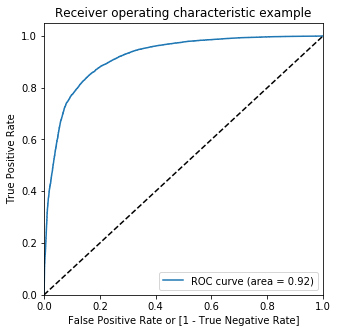

In [443]:
draw_roc(y_train_pred_df.Churn, y_train_pred_df.Churn_Prob)

In [444]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Churn,Churn_Prob,Custid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.476905,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0.210645,1,0,1,1,1,0,0,0,0,0,0,0
2,0,0.057122,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.369604,3,0,1,1,1,1,0,0,0,0,0,0
4,0,0.001310,4,0,1,0,0,0,0,0,0,0,0,0


In [445]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.730643     0.979235     0.482052
0.2   0.2  0.782342     0.960294     0.604389
0.3   0.3  0.811692     0.940065     0.683318
0.4   0.4  0.828916     0.910232     0.747599
0.5   0.5  0.840854     0.876429     0.805280
0.6   0.6  0.842544     0.821538     0.863551
0.7   0.7  0.829694     0.738638     0.920749
0.8   0.8  0.753877     0.546655     0.961099
0.9   0.9  0.673472     0.361432     0.985513


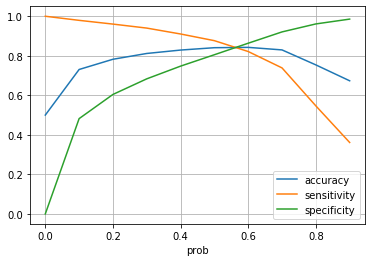

In [446]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In [447]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_df.head()

,Churn,Churn_Prob,Custid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.476905,0,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.210645,1,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.057122,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.369604,3,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.001310,4,0,1,0,0,0,0,0,0,0,0,0,0


In [448]:
confusionfin = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df.final_predicted )
confusionfin

array([[15561,  3076],
       [ 2768, 15869]], dtype=int64)

In [449]:
TPfin = confusionfin[1,1] # true positive 
TNfin = confusionfin[0,0] # true negatives
FPfin = confusionfin[0,1] # false positives
FNfin = confusionfin[1,0] # false negatives

In [450]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity of the new model is',(TPfin / float(TPfin+FNfin))*100)

Sensitivity of the new model is 85.14782422063637


### Making predictions on test. 

In [451]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_test_smt, y_test_smt = smt.fit_resample(X_test,y_test)
X_test_smt.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
0,1738.155,1035.79,1248.48,60.83,25.69,36.68,347.59,31.63,0.0,415.91,978.19,858.99,0.00,1837.19,5.46,0.00,0.0,2258.58,53.66,388.14,51.4300,493.24,219.8392,364.0322,0.35,560.484,1725.94,0.0,30.69,0.0,29,1971,130,130,2.0,98.0,2.0,0.0,144.0,25.82,266.26,19.55,42.02,0,2,0,0,1577,222.64,271.86,277.45,202.18,1106.0575,619.560,343.315,0.000,0.00,51.045,211.820,35.22,0.000,298.095,568.510,89.455,6.075,664.045,0.740,0.00,0.0,962.885,57.475,319.035,65.8700,442.395,200.7084,231.045,0.000,549.7603,1681.770,0.00,57.90,0.0,21.5,1192.5,110.0,40.0,3.0,98.0,3.0,0.0,148.00,15.270,329.780,118.850,2.280,0.0,3.0,0.0,0.0,1736.5,0,0,0,0,0,0,1,0,1,0,1,0
1,140.070,39.04,40.08,0.00,0.00,12.59,19.31,2.94,0.0,34.86,0.00,0.00,26.44,26.44,3.09,17.81,0.0,82.23,5.51,13.14,33.2600,51.93,0.9100,0.0000,0.00,0.910,52.84,0.0,0.00,0.0,15,126,59,0,8.0,252.0,1.0,5.0,672.0,202.45,2289.00,450.08,437.06,1,0,2,5,3203,1523.59,1255.39,1545.38,0.00,432.6160,43.155,217.850,10.365,4.43,32.735,81.325,0.65,6.205,114.720,6.425,125.230,3.990,135.645,12.895,6.63,0.0,269.900,9.300,52.185,39.9950,101.495,8.8150,229.750,2.225,240.7900,359.760,0.00,17.46,0.0,12.5,436.5,84.5,0.0,4.5,166.5,1.5,3.0,443.50,105.245,2322.160,172.985,165.255,1.0,0.5,0.5,2.5,2410.5,0,0,1,0,0,0,1,0,1,0,1,0
2,109.322,1.65,91.93,0.00,0.00,1.65,91.93,0.00,0.0,93.58,0.00,0.00,0.00,0.00,0.00,0.00,0.0,93.58,12.28,341.93,189.5262,841.66,0.0000,0.0000,0.25,0.250,841.91,0.0,0.00,0.0,4,140,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,10.02,19.90,0,0,0,0,1014,0.00,0.00,0.00,0.00,202.1815,22.635,112.445,0.000,0.00,22.635,88.100,3.33,0.190,114.080,0.000,3.040,0.000,3.040,0.000,17.96,0.0,135.085,59.400,378.460,194.1983,1192.480,0.0000,0.000,0.745,0.7450,1193.230,0.00,0.00,0.0,10.5,230.0,50.0,35.0,5.5,25.0,4.5,1.0,71.25,165.555,0.000,21.910,22.930,0.0,4.5,0.0,1.0,632.5,0,0,0,0,0,1,1,0,1,0,0,1
3,693.657,207.44,406.24,0.00,0.00,96.53,225.81,0.75,0.0,323.09,110.91,177.49,2.18,290.59,0.00,0.00,0.0,613.69,63.68,223.03,10.4900,297.21,12.4900,39.7100,0.00,52.210,349.43,0.0,0.00,0.0,18,834,154,50,1.0,154.0,1.0,0.0,154.0,17.38,926.12,0.01,0.00,1,0,0,0,1214,292.17,536.65,174.22,0.00,759.0655,458.585,526.510,0.000,0.00,84.120,72.280,16.38,0.000,172.785,374.460,437.845,0.000,812.310,0.000,0.00,0.0,985.100,33.960,134.955,2.7650,171.685,63.7000,127.760,0.000,191.4700,363.160,0.00,0.00,0.0,22.5,882.0,154.0,40.0,1.0,154.0,1.0,0.0,154.00,13.200,785.985,19.605,1.320,1.0,0.0,0.0,0.0,1036.0,0,0,0,0,0,0,1,0,1,0,1,0
4,121.

In [452]:
scaler = StandardScaler()
tcondition1 = X_test_smt.dtypes == 'float'
tcondition2 = X_test_smt.dtypes == 'ínt'
tcondition = tcondition1 | tcondition2

numericalt = X_test_smt.dtypes[tcondition].index.to_list()

X_test_smt[numericalt] = scaler.fit_transform(X_test_smt[numericalt])

X_test_smt.head()


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,total_og_mou,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,std_ic_mou,total_ic_mou,spl_ic_mou,isd_ic_mou,ic_others,total_rech_num,total_rech_amt,max_rech_amt,last_day_rch_amt,total_rech_data,max_rech_data,count_rech_2g,count_rech_3g,av_rech_amt_data,vol_2g_mb,vol_3g_mb,arpu_3g,arpu_2g,monthly_2g,sachet_2g,monthly_3g,sachet_3g,total_recharge_amt,night_pck_user_6_1.0,night_pck_user_6_99.0,night_pck_user_7_1.0,night_pck_user_7_99.0,night_pck_user_8_1.0,night_pck_user_8_99.0,fb_user_6_1.0,fb_user_6_99.0,fb_user_7_1.0,fb_user_7_99.0,fb_user_8_1.0,fb_user_8_99.0
0,3.686945,2.351180,2.557136,0.863853,-0.087549,-0.119203,1.441287,2.834970,-0.35809,0.975748,2.747442,2.339130,-0.195827,3.122408,1.579921,-0.464195,0.0,3.099150,0.164238,1.949342,1.841684,1.550614,8.597324,7.799657,-0.165511,7.668906,5.806218,-0.209933,0.915151,-0.214184,29,1971,130,130,0.458756,0.641820,0.643377,-0.331977,0.518134,-0.204176,0.152479,-0.193109,-0.015136,0,2,0,0,1577,0.413636,0.473593,0.642780,9.442430,1.663061,0.676226,-0.177112,-0.369403,-0.411050,-0.113534,0.460704,2.973333,-0.482874,0.338087,0.838968,-0.393052,1.164319,0.271536,-0.029813,-0.647155,-0.442311,0.376408,0.086607,1.255822,2.121383,1.130528,7.705445,4.447000,-0.287193,7.387994,5.513348,-0.497243,1.801144,-0.319964,1.110028,1.346883,-0.345393,-0.590929,0.687904,0.503652,0.938305,-0.451073,0.371683,-0.372615,0.186601,0.599301,-0.580010,-0.417086,1.007367,-0.361673,-0.317606,0.863357,0,0,0,0,0,0,1,0,1,0,1,0
1,-0.761247,-0.457456,-0.609880,-0.377741,-0.413563,-0.325377,-0.481513,-0.044610,-0.35809,-0.475435,-0.423678,-0.440305,6.974110,-0.497309,0.828428,1.193138,0.0,-0.622153,-0.437515,-0.574679,1.062606,-0.447692,-0.301927,-0.389306,-0.233535,-0.400685,-0.523348,-0.209933,-0.226583,-0.214184,15,126,59,0,3.373999,2.511026,0.097819,7.037936,4.368642,0.680919,3.976981,3.864761,4.253875,1,0,2,5,3203,4.974638,3.571595,5.266980,-0.166272,-0.488848,-0.637077,-0.454229,-0.156226,-0.356782,-0.256054,-0.282759,-0.322890,1.338862,-0.332419,-0.567619,-0.306622,0.679265,-0.587777,2.503404,-0.011054,-0.442311,-0.698275,-0.531208,-0.475734,1.125402,-0.398786,-0.136087,4.419018,0.097992,2.902885,0.437483,-0.497243,0.335934,-0.319964,-0.068334,-0.687340,-0.567029,-1.082761,1.362989,1.343846,0.185592,3.800202,2.548552,0.033890,3.956090,1.096157,1.179192,2.784063,-0.250908,0.918613,4.338146,1.711198,0,0,1,0,0,0,1,0,1,0,1,0
2,-0.846833,-0.562813,-0.473990,-0.377741,-0.413563,-0.419007,-0.056164,-0.339695,-0.35809,-0.251807,-0.423678,-0.440305,-0.195827,-0.550163,-0.151365,-0.464195,0.0,-0.602746,-0.352907,1.638315,7.762859,3.128303,-0.338917,-0.389306,-0.184946,-0.410202,2.461812,-0.209933,-0.226583,-0.214184,4,140,50,50,-0.512991,-0.547675,-0.447738,-0.331977,-0.532004,-0.333560,-0.350953,-0.282932,-0.254176,0,0,0,0,1014,-0.366918,-0.382734,-0.369093,-0.166272,-1.225177,-0.683831,-0.687040,-0.369403,-0.411050,-0.334670,-0.244160,-0.067354,-0.427092,-0.334759,-0.583697,-0.601825,-0.248968,-0.803427,-0.184036,1.075977,-0.442311,-0.9073

In [453]:
X_test_smt = X_test_smt.drop(['std_og_mou','onnet_mou','count_rech_2g_8','loc_og_mou_8','fb_user_7_99.0','fb_user_6_99.0',
                              'total_rech_data_8','arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8','loc_og_t2f_mou_8',
                              'loc_og_t2c_mou_8', 'std_og_t2t_mou_8','std_og_t2m_mou_8', 'std_og_t2f_mou_8', 
                              'std_og_mou_8', 'isd_og_mou_8','spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
                              'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8','std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 
                              'std_ic_t2f_mou_8','std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
                              'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8','last_day_rch_amt_8', 'max_rech_data_8', 
                              'av_rech_amt_data_8','vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'aon','aug_vbc_3g', 
                              'jul_vbc_3g', 'jun_vbc_3g','sep_vbc_3g', 'arpu','offnet_mou', 'roam_ic_mou', 'roam_og_mou', 
                              'loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou','std_og_t2m_mou', 
                              'std_og_t2f_mou', 'isd_og_mou', 'spl_og_mou','og_others', 'loc_ic_t2t_mou', 
                              'loc_ic_t2m_mou', 'loc_ic_t2f_mou','loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',                              'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num','total_rech_amt', 
                              'max_rech_amt', 'last_day_rch_amt', 'total_rech_data','max_rech_data', 
                              'count_rech_2g', 'count_rech_3g', 'vol_2g_mb','vol_3g_mb', 'arpu_3g', 'monthly_2g', 
                              'sachet_2g', 'monthly_3g','sachet_3g', 'night_pck_user_8_99.0', 'fb_user_8_99.0'], axis = 1)

In [454]:
X_test_sm = sm.add_constant(X_test_smt)
X_test_sm.shape

(15976, 24)

In [457]:
y_test_pred = res3.predict(X_test_sm)

In [458]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [460]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test_smt)
y_test_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [461]:
# Putting Lead Number to index

y_test_df['CustId'] = y_test_df.index

In [462]:
# Removing index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [463]:
# Appending y_test_df and y_pred_test
y_test_pred_df = pd.concat([y_test_df, y_test_pred],axis=1)

In [464]:
# Renaming the column 0 as Lead prob

y_test_pred_df= y_test_pred_df.rename(columns={ 0 : 'Churn_Prob'})

In [467]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_pred_df.head()

,churn,CustId,Churn_Prob,final_predicted
0,0,0,0.000204,0
1,0,1,0.000132,0
2,0,2,0.259383,0
3,0,3,0.008953,0
4,0,4,0.222678,0


In [468]:
confusiontest = metrics.confusion_matrix(y_test_pred_df.churn, y_test_pred_df.final_predicted )
confusiontest

array([[6598, 1390],
       [1112, 6876]], dtype=int64)

In [469]:
TP_test = confusiontest[1,1] # true positive 
TN_test = confusiontest[0,0] # true negatives
FP_test = confusiontest[0,1] # false positives
FN_test = confusiontest[1,0] # false negatives

In [471]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity of test set is',(TP_test / float(TP_test + FN_test))*100)

Sensitivity of test set is 86.07911867801702


### Decision Trees

In [472]:
from sklearn.tree import DecisionTreeRegressor

In [473]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [474]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

### for decision tree, no need to scale the Train set. You can scale the y values as in the this case of housing prices, it could be very high.

In [475]:
df_train.shape, df_test.shape

((19714, 113), (8449, 113))

In [477]:
scaler = StandardScaler()